# Linear Regression

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Data preparation

A linear regression line has an equation of the form 

Y = a + bX

where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). [[1](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)]

In [16]:
X = torch.randn(100, 1) * 10
Y = 2 * X + 3 + torch.randn(100, 1) * 2

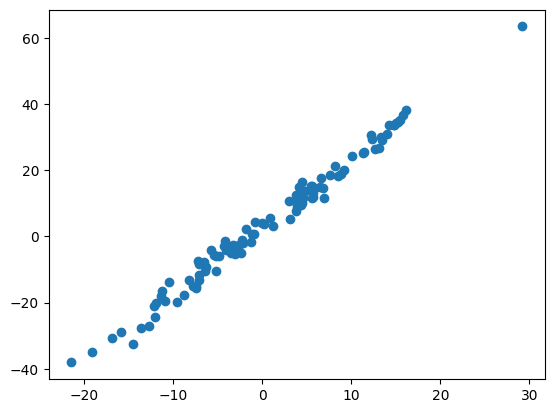

In [17]:
plt.scatter(X, Y)

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

The most common method for fitting a regression line is the **method of least-squares**. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

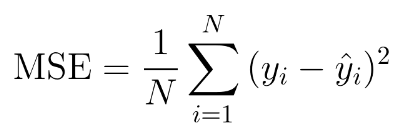

In [19]:
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [45]:
lossi = []

num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(X)
    loss = criterion(outputs, Y)
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
        
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 5.0309
Epoch [200/1000], Loss: 5.0309
Epoch [300/1000], Loss: 5.0309
Epoch [400/1000], Loss: 5.0309
Epoch [500/1000], Loss: 5.0309
Epoch [600/1000], Loss: 5.0309
Epoch [700/1000], Loss: 5.0309
Epoch [800/1000], Loss: 5.0309
Epoch [900/1000], Loss: 5.0309
Epoch [1000/1000], Loss: 5.0309


In [46]:
model.eval()
predicted = model(X).detach().numpy()

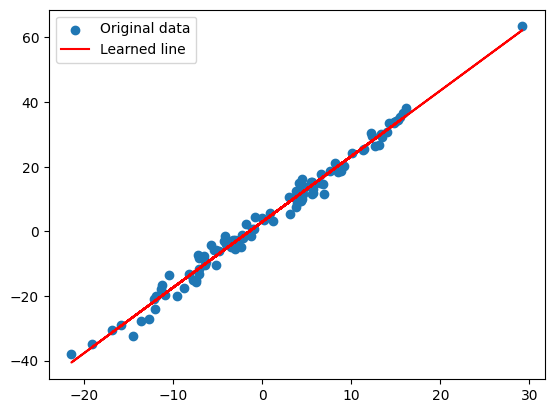

In [47]:
plt.scatter(X.numpy(), Y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted, label='Learned line', color='r')
plt.legend()
plt.show()